#Spam Mail Detector

##Phase 1

Importing the libraries and the dataset

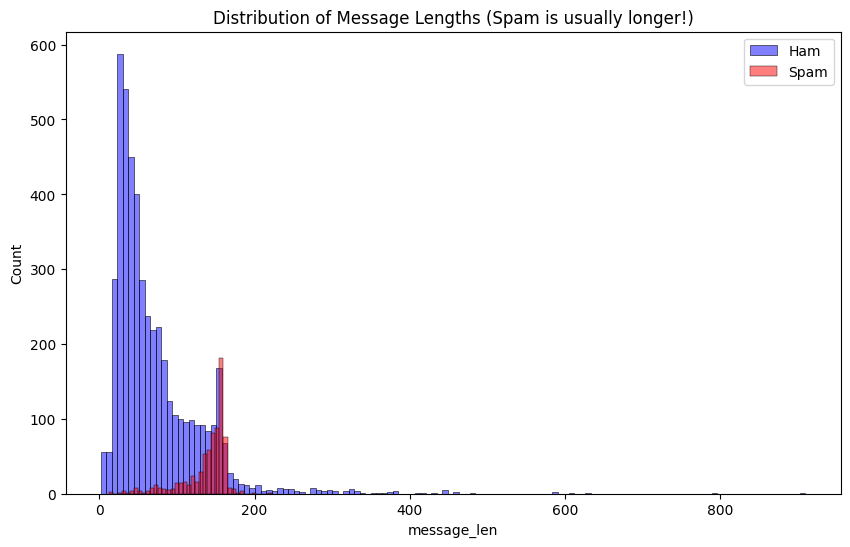

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data (Using a direct URL for the UCI dataset version)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# 2. Convert Labels to Numbers (Ham=0, Spam=1)
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# 3. Visualize Message Lengths
df['message_len'] = df.message.apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label']=='ham']['message_len'], label='Ham', color='blue', alpha=0.5)
sns.histplot(df[df['label']=='spam']['message_len'], label='Spam', color='red', alpha=0.5)
plt.title('Distribution of Message Lengths (Spam is usually longer!)')
plt.legend()
plt.show()

##Phase 2

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Define X (Text) and y (Label)
X = df.message
y = df.label_num

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Vectorize (Convert text to numbers using TF-IDF)
# 'stop_words="english"' removes words like 'the', 'a', 'in' automatically
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

##Phase 3

Importing Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# 1. Initialize & Train
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

##Phase 4

Classification Report:

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



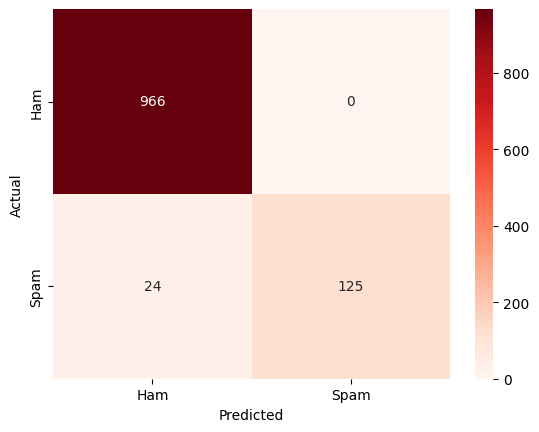

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Predict
y_pred = model.predict(X_test_vec)

# 2. Detailed Report
# Pay attention to the 'Precision' for class 1 (Spam)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# 3. Visual Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##Phase 5

In [ ]:
def check_spam(text_message):
    # 1. Vectorize the input using the same vectorizer
    text_vec = vectorizer.transform([text_message])

    # 2. Predict
    prediction = model.predict(text_vec)[0]

    # 3. Return result
    return "SPAM 🚨" if prediction == 1 else "Not Spam (Ham) ✅"

# Test it with your own made-up messages
print(check_spam("URGENT! You have won a free iPhone. Call now to claim."))
print(check_spam("Hey man, are we still meeting for lunch tomorrow?"))

SPAM 🚨
Not Spam (Ham) ✅
